In [1]:
from keras import losses

In [2]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
## Train, Validation, Test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [4]:
X_train = X_train.reshape(-1,28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(input_shape,)))
network.add(Dense(output_shape, activation='softmax'))

In [5]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
network.compile(optimizer=opt,
                loss=loss,
                metrics=metrics)

In [6]:
epochs = 10
batch_size = 200
network.fit(X_train , 
          y_train ,
          epochs = epochs, 
          batch_size = batch_size,
         validation_data=(X_val,y_val))

Epoch 1/10
240/240 [==============================] - 1s 4ms/step - loss: 8.7699 - accuracy: 0.8761 - val_loss: 1.1991 - val_accuracy: 0.9403
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.8093 - accuracy: 0.9501 - val_loss: 1.0385 - val_accuracy: 0.9411
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.5301 - accuracy: 0.9647 - val_loss: 0.7042 - val_accuracy: 0.9657
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.9733 - val_loss: 0.7311 - val_accuracy: 0.9643
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.9768 - val_loss: 0.8674 - val_accuracy: 0.9600
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9808 - val_loss: 1.1162 - val_accuracy: 0.9562
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9826 - val_loss: 0.8802 - val_accuracy: 0.9664
Epoch 

In [7]:
network.evaluate(X_test,y_test)[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.7944 - accuracy: 0.9718


0.9718000292778015

In [8]:
from keras.datasets import imdb

In [9]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [10]:
np.unique(np.array(X_train[0])).size

120

In [11]:
len(X_train[0])

218

In [12]:
np.apply_along_axis(len,0,X_train.reshape(-1,1))

array([25000])

In [14]:
import pandas as pd
pd.Series(X_train).apply(len)

0        218
1        189
2        141
3        550
4        147
        ... 
24995    180
24996    328
24997    184
24998    150
24999    153
Length: 25000, dtype: int64

In [15]:
max([max(sequence) for sequence in X_train])

9999

In [16]:
word_index = imdb.get_word_index()

In [17]:
index_word = { v:k for k,v in word_index.items()}

In [18]:
X_train_word = []
for i in X_train[0]:
    X_train_word.append(index_word[i])

In [19]:
X_train_word

['the',
 'as',
 'you',
 'with',
 'out',
 'themselves',
 'powerful',
 'lets',
 'loves',
 'their',
 'becomes',
 'reaching',
 'had',
 'journalist',
 'of',
 'lot',
 'from',
 'anyone',
 'to',
 'have',
 'after',
 'out',
 'atmosphere',
 'never',
 'more',
 'room',
 'and',
 'it',
 'so',
 'heart',
 'shows',
 'to',
 'years',
 'of',
 'every',
 'never',
 'going',
 'and',
 'help',
 'moments',
 'or',
 'of',
 'every',
 'chest',
 'visual',
 'movie',
 'except',
 'her',
 'was',
 'several',
 'of',
 'enough',
 'more',
 'with',
 'is',
 'now',
 'current',
 'film',
 'as',
 'you',
 'of',
 'mine',
 'potentially',
 'unfortunately',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'themselves',
 'her',
 'get',
 'for',
 'was',
 'camp',
 'of',
 'you',
 'movie',
 'sometimes',
 'movie',
 'that',
 'with',
 'scary',
 'but',
 'and',
 'to',
 'story',
 'wonderful',
 'that',
 'in',
 'seeing',
 'in',
 'character',
 'to',
 'of',
 '70s',
 'musicians',
 'with',
 'heart',
 'had',
 'shadows',
 'they',
 'of',
 'here',
 

In [20]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [21]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [23]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [24]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(18750, 10000)
(6250, 10000)
(25000, 10000)
(18750, 1)
(6250, 1)
(25000, 1)


In [25]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

In [26]:
model = Sequential()
model.add(Dense(100,activation='sigmoid',input_shape=(input_shape,)))
model.add(Dense(28,activation='tanh'))
model.add(Dense(20,activation='relu'))
model.add(Dense(output_shape,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_3 (Dense)              (None, 28)                2828      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                580       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,003,529
Trainable params: 1,003,529
Non-trainable params: 0
_________________________________________________________________


In [28]:
opt = 'adam'
# loss = 'binary_crossentropy'
loss = 'mse'
metrics = ['accuracy','mse']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

In [29]:
epochs = 100
batch_size = 300
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_val,y_val))

Epoch 1/100
63/63 [==============================] - 1s 16ms/step - loss: 0.1317 - accuracy: 0.8355 - mse: 0.1317 - val_loss: 0.0823 - val_accuracy: 0.8917 - val_mse: 0.0823
Epoch 2/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0580 - accuracy: 0.9278 - mse: 0.0580 - val_loss: 0.0797 - val_accuracy: 0.8914 - val_mse: 0.0797
Epoch 3/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0390 - accuracy: 0.9550 - mse: 0.0390 - val_loss: 0.0870 - val_accuracy: 0.8806 - val_mse: 0.0870
Epoch 4/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0273 - accuracy: 0.9706 - mse: 0.0273 - val_loss: 0.0974 - val_accuracy: 0.8709 - val_mse: 0.0974
Epoch 5/100
63/63 [==============================] - 1s 12ms/step - loss: 0.0211 - accuracy: 0.9782 - mse: 0.0211 - val_loss: 0.0974 - val_accuracy: 0.8779 - val_mse: 0.0974
Epoch 6/100
63/63 [==============================] - 1s 11ms/step - loss: 0.0160 - accuracy: 0.9849 - mse: 0.0160 - val_loss: 0.10

In [30]:
import matplotlib.pyplot as plt

In [31]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])

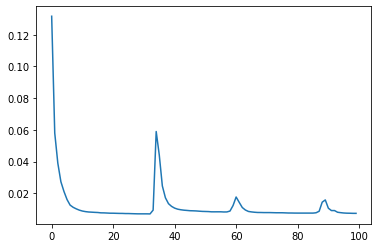

In [32]:
plt.plot(model.history.history['loss'])

In [33]:
from keras.datasets import reuters

In [34]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [36]:
word_index = reuters.get_word_index()

In [37]:
x = [ i for i in word_index.values()]

In [38]:
min(x),max(x)

(1, 30979)

In [39]:
X_train = vectorize_sequences(X_train,dimension=30982)
X_test = vectorize_sequences(X_test,dimension=30982)
X_val = vectorize_sequences(X_val,dimension=30982)
# X_train = vectorize_sequences(X_train)
# X_test = vectorize_sequences(X_test)
# X_val = vectorize_sequences(X_val)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [40]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

model = Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(input_shape,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

In [41]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics,)

In [42]:
epochs = 100
batch_size = 200
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_val,y_val))

Epoch 1/100
36/36 [==============================] - 1s 29ms/step - loss: 2.5171 - accuracy: 0.4004 - val_loss: 1.9546 - val_accuracy: 0.4919
Epoch 2/100
36/36 [==============================] - 1s 21ms/step - loss: 1.7286 - accuracy: 0.5825 - val_loss: 1.5747 - val_accuracy: 0.6400
Epoch 3/100
36/36 [==============================] - 1s 21ms/step - loss: 1.3444 - accuracy: 0.6985 - val_loss: 1.3450 - val_accuracy: 0.6939
Epoch 4/100
36/36 [==============================] - 1s 20ms/step - loss: 1.0734 - accuracy: 0.7510 - val_loss: 1.1995 - val_accuracy: 0.7206
Epoch 5/100
36/36 [==============================] - 1s 20ms/step - loss: 0.8645 - accuracy: 0.8067 - val_loss: 1.1063 - val_accuracy: 0.7507
Epoch 6/100
36/36 [==============================] - 1s 21ms/step - loss: 0.6941 - accuracy: 0.8429 - val_loss: 1.0389 - val_accuracy: 0.7774
Epoch 7/100
36/36 [==============================] - 1s 21ms/step - loss: 0.5520 - accuracy: 0.8791 - val_loss: 0.9863 - val_accuracy: 0.7880
Epoch 

In [43]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 3s 39ms/step - loss: 1.2595 - accuracy: 0.7872


[1.2595428228378296, 0.7871772050857544]

In [44]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 2s 32ms/step - loss: 1.2595 - accuracy: 0.7872


[1.2595428228378296, 0.7871772050857544]

In [45]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 2s 35ms/step - loss: 1.2595 - accuracy: 0.7872


[1.2595428228378296, 0.7871772050857544]

In [46]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 1s 17ms/step - loss: 1.2595 - accuracy: 0.7872


[1.2595428228378296, 0.7871772050857544]

In [ ]:
model.evaluate(X_test,y_test)

50/71 [====================>.........] - ETA: 0s - loss: 1.2273 - accuracy: 0.7887